# 주요 금융지표/자산과 국내 시장의 상관관계 분석

In [258]:
# import libraries
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [259]:
# 데이터 분석 기간 설정
start_date = '20200106'
end_date = '20220429'

In [260]:
# get KOSPI and KOSDAQ data
KOSPI = fdr.DataReader('KS11', start_date, end_date)
KOSDAQ = fdr.DataReader('KQ11', start_date, end_date)

In [261]:
# linear regression analysis function
def linearRegressionAnalysis(target):
    kospi_target_regr = stats.linregress(target, df.KOSPI)
    kospi_target_regr_line = f'Y = {kospi_target_regr.slope:.2f} * X + {kospi_target_regr.intercept:.2f}'
    kosdaq_target_regr = stats.linregress(target, df.KOSDAQ)
    kosdaq_target_regr_line = f'Y = {kosdaq_target_regr.slope:.2f} * X + {kosdaq_target_regr.intercept:.2f}'

    return kospi_target_regr, kospi_target_regr_line, kosdaq_target_regr, kosdaq_target_regr_line

In [262]:
# function for visualizing scatter plot and linear regression
def visualize(target, targetName, kospi, kospi_target_regr, kospi_target_regr_line, kosdaq, kosdaq_target_regr, kosdaq_target_regr_line):
    plt.figure(figsize=(14,7))

    plt.subplot(1, 2, 1)
    plt.scatter(target, kospi, marker='.', color='red') # 산점도
    plt.plot(target, kospi_target_regr.slope * target + kospi_target_regr.intercept, 'k')
    plt.legend([f'{targetName} x KOSPI', kospi_target_regr_line])
    plt.title(f'{targetName} x KOSPI (R = {kospi_target_regr.rvalue:.2f})') # R = target-KOSPI 상관계수
    plt.xlabel(f'{targetName}')
    plt.ylabel("KOSPI")

    plt.subplot(1, 2, 2)
    plt.scatter(target, kosdaq, marker='.', color='blue') # 산점도
    plt.plot(target, kosdaq_target_regr.slope * target + kosdaq_target_regr.intercept, 'k')
    plt.legend([f'{targetName} x KOSDAQ', kosdaq_target_regr_line])
    plt.title(f'{targetName} x KOSDAQ (R = {kosdaq_target_regr.rvalue:.2f})') # R = target-KOSDAQ 상관계수
    plt.xlabel(f'{targetName}')
    plt.ylabel("KOSDAQ")

    plt.savefig(f'./Result/{targetName}_Analysis.png') # ./Result에 이미지 파일 저장
    
    return

* * *
## 1. 다우존스 지수와 국내 시장 상관관계 분석

### 다우존스 지수란?  
미국의 다우존스(Dow Jones)사가 뉴욕증권시장에 상장된 우량기업 주식 30개 종목을 표본으로 하여 시장가격을 평균하여 산출하는 세계적인 주가지수.

In [263]:
# get DowJones data
DJI = fdr.DataReader('dji', start_date, end_date)

# set data frame
df = pd.DataFrame({'DOW': DJI['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 DOW 지수가 금일 국내 시장에 반영되는것을 고려
df['DOW'] = df['DOW'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

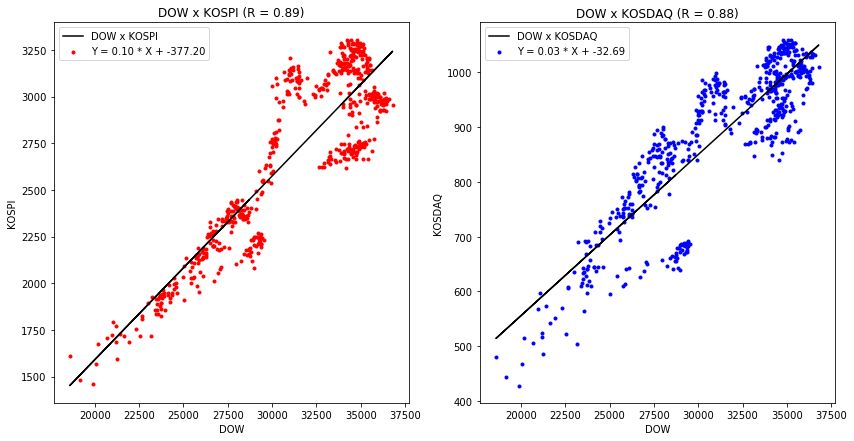

In [264]:
# linear regression analysis
kospi_dji_regr, kospi_dji_regr_line, kosdaq_dji_regr, kosdaq_dji_regr_line = linearRegressionAnalysis(df.DOW)

# visualize scatter plot and linear regression
visualize(df.DOW, "DOW", df.KOSPI, kospi_dji_regr, kospi_dji_regr_line, df.KOSDAQ, kosdaq_dji_regr, kosdaq_dji_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
다우존스 지수는 KOSPI와의 상관계수가 0.89, KOSDAQ과의 상관계수가 0.88로 분석되었다.  

* * *
## 2. 나스닥 지수와 국내 시장 상관관계 분석

### 나스닥 지수란?  
미국의 장외 증권 시장. 1971년 시작하였으며 주로 벤처 기업이 중심이 된다.

In [265]:
# get Nasdaq data
NAS = fdr.DataReader('NASDAQCOM', start_date, end_date, data_source='fred')

# set data frame
df = pd.DataFrame({'NAS': NAS['NASDAQCOM'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 Nasdaq 지수가 금일 국내 시장에 반영되는것을 고려
df['NAS'] = df['NAS'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

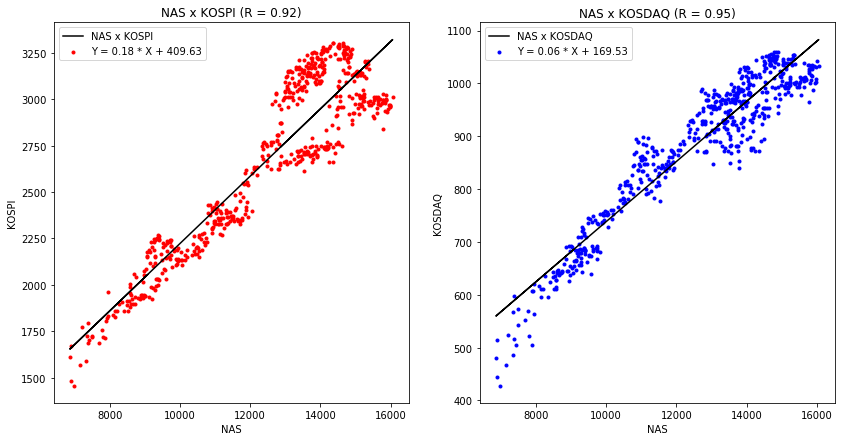

In [266]:
# linear regression analysis
kospi_nas_regr, kospi_nas_regr_line, kosdaq_nas_regr, kosdaq_nas_regr_line = linearRegressionAnalysis(df.NAS)

# visualize scatter plot and linear regression
visualize(df.NAS, "NAS", df.KOSPI, kospi_nas_regr, kospi_nas_regr_line, df.KOSDAQ, kosdaq_nas_regr, kosdaq_nas_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
나스닥 지수는 KOSPI와의 상관계수가 0.92, KOSDAQ과의 상관계수가 0.95로 분석되었다.  

* * *
## 3. S&P 500 지수와 국내 시장 상관관계 분석

### S&P 500 지수란?  
S&P 500 지수는 국제 신용평가기관인 미국의 Standard and Poors(S&P)이 작성한 주가 지수이다.  
다우존스 지수와 마찬가지로 뉴욕증권거래소에 상장된 기업의 주가 지수지만,  
지수 산정에 포함되는 종목수가 다우지수의 30개보다 훨씬 많은 500개이다.

In [267]:
# get S&P 500 data
SP5 = fdr.DataReader('US500', start_date, end_date)

# set data frame
df = pd.DataFrame({'SP5': SP5['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 S&P 500 지수가 금일 국내 시장에 반영되는것을 고려
df['SP5'] = df['SP5'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

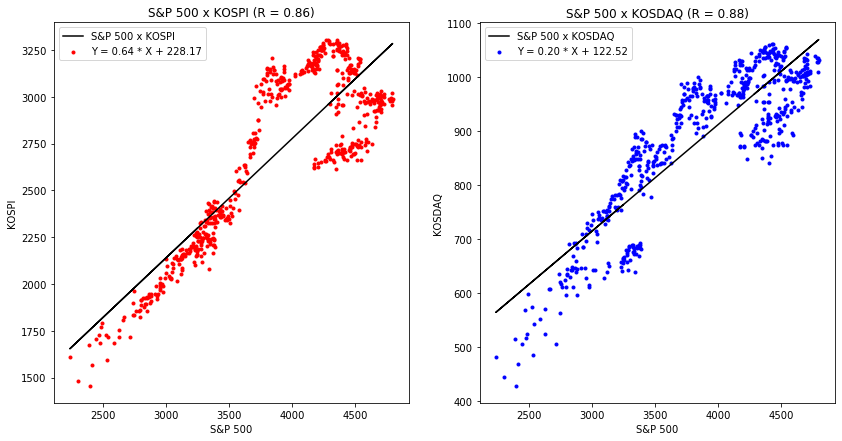

In [268]:
# linear regression analysis
kospi_sp5_regr, kospi_sp5_regr_line, kosdaq_sp5_regr, kosdaq_sp5_regr_line = linearRegressionAnalysis(df.SP5)

# visualize scatter plot and linear regression
visualize(df.SP5, "S&P 500", df.KOSPI, kospi_sp5_regr, kospi_sp5_regr_line, df.KOSDAQ, kosdaq_sp5_regr, kosdaq_sp5_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
S&P 500 지수는 KOSPI와의 상관계수가 0.86, KOSDAQ과의 상관계수가 0.88로 분석되었다.  

* * *
## 4. 비트코인과 국내 시장 상관관계 분석

### 비트코인이란?  
비트코인은 암호화된 가상자산으로서, 블록체인 기술이 적용되어있다.  

In [269]:
# get Bitcoin data
BTC = fdr.DataReader('BTC/KRW',start_date,end_date)

# set data frame
df = pd.DataFrame({'BTC': BTC['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 빗썸은 일 종가가 24시에 반영되는것을 고려하여 전일 지표를 사용
df['BTC'] = df['BTC'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

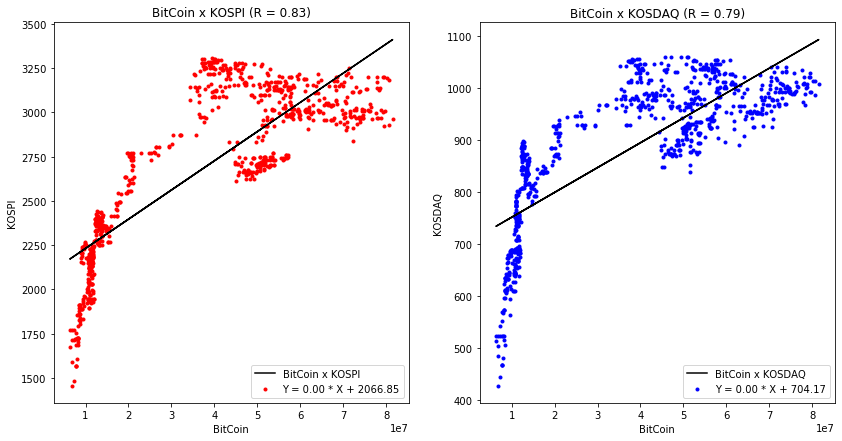

In [270]:
# linear regression analysis
kospi_btc_regr, kospi_btc_regr_line, kosdaq_btc_regr, kosdaq_btc_regr_line = linearRegressionAnalysis(df.BTC)

# visualize scatter plot and linear regression
visualize(df.BTC, "BitCoin", df.KOSPI, kospi_btc_regr, kospi_btc_regr_line, df.KOSDAQ, kosdaq_btc_regr, kosdaq_btc_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
비트코인은 KOSPI와의 상관계수가 0.83, KOSDAQ과의 상관계수가 0.79로 분석되었다.  

* * *
## 5. 이더리움과 국내 시장 상관관계 분석

### 이더리움이란?  
이더리움은 암호화된 가상자산으로서, 블록체인 기술이 적용되어있다.  
비트코인을 제외한 알트코인 중에서 가장 규모가 큰 것으로 평가받는다.   

In [271]:
# get Ethereum data
ETH = fdr.DataReader('ETH/KRW',start_date,end_date)

# set data frame
df = pd.DataFrame({'ETH': ETH['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 빗썸은 일 종가가 24시에 반영되는것을 고려하여 전일 지표를 사용
df['ETH'] = df['ETH'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

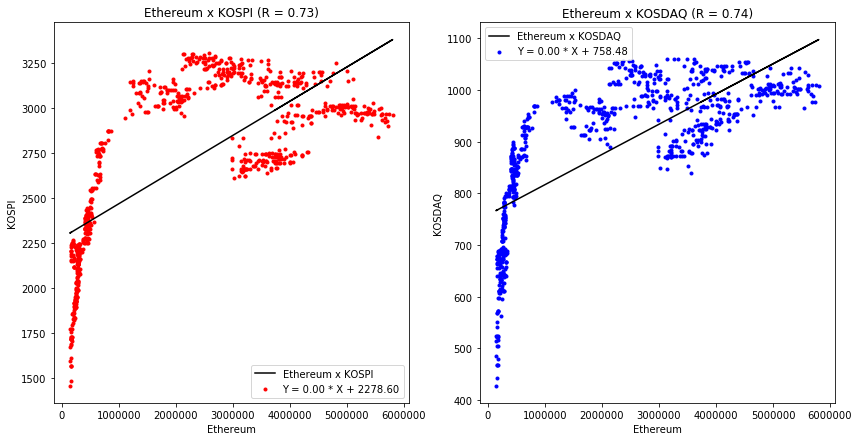

In [272]:
# linear regression analysis
kospi_eth_regr, kospi_eth_regr_line, kosdaq_eth_regr, kosdaq_eth_regr_line = linearRegressionAnalysis(df.ETH)

# visualize scatter plot and linear regression
visualize(df.ETH, "Ethereum", df.KOSPI, kospi_eth_regr, kospi_eth_regr_line, df.KOSDAQ, kosdaq_eth_regr, kosdaq_eth_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
이더리움은 KOSPI와의 상관계수가 0.73, KOSDAQ과의 상관계수가 0.74로 분석되었다.  

* * *
## 6. 원달러 환율과 국내 시장 상관관계 분석

### 원달러 환율이란?  
1달러에 대한 원화의 가치  

In [273]:
# get USD/KRW data
USD = fdr.DataReader('USD/KRW', start_date, end_date)

# set data frame
df = pd.DataFrame({'USD': USD['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

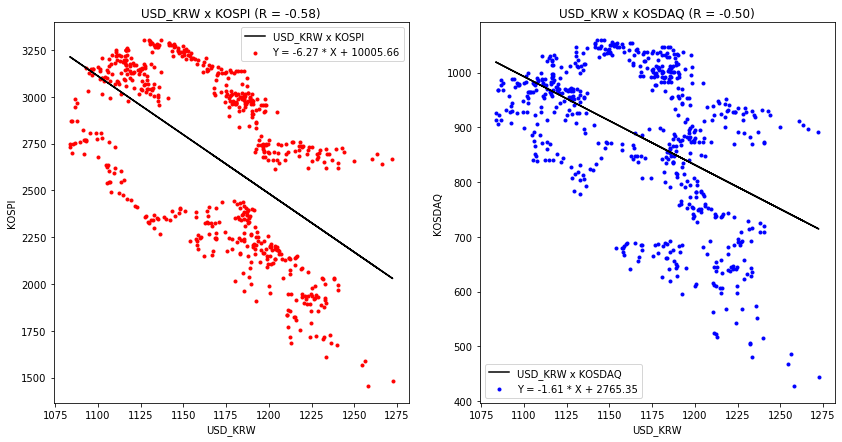

In [274]:
# linear regression analysis
kospi_usd_regr, kospi_usd_regr_line, kosdaq_usd_regr, kosdaq_usd_regr_line = linearRegressionAnalysis(df.USD)

# visualize scatter plot and linear regression
visualize(df.USD, "USD_KRW", df.KOSPI, kospi_usd_regr, kospi_usd_regr_line, df.KOSDAQ, kosdaq_usd_regr, kosdaq_usd_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
원달러 환율은 KOSPI와의 상관계수가 -0.58, KOSDAQ과의 상관계수가 -0.50으로 분석되었다.  

* * *
## 7. 원유로 환율과 국내 시장 상관관계 분석

### 원유로 환율이란?  
1유로에 대한 원화의 가치  

In [275]:
# get EUR/KRW data
EUR = fdr.DataReader('EUR/KRW', start_date, end_date)

# set data frame
df = pd.DataFrame({'EUR': EUR['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

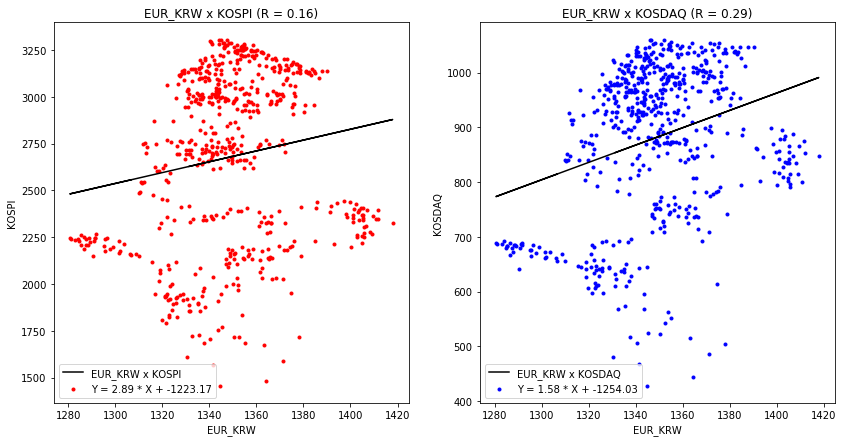

In [276]:
# linear regression analysis
kospi_eur_regr, kospi_eur_regr_line, kosdaq_eur_regr, kosdaq_eur_regr_line = linearRegressionAnalysis(df.EUR)

# visualize scatter plot and linear regression
visualize(df.EUR, "EUR_KRW", df.KOSPI, kospi_eur_regr, kospi_eur_regr_line, df.KOSDAQ, kosdaq_eur_regr, kosdaq_eur_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
원유로 환율은 KOSPI와의 상관계수가 0.16, KOSDAQ과의 상관계수가 0.29로 분석되었다.  

* * *
## 8. 원엔 환율과 국내 시장 상관관계 분석

### 원엔 환율이란?  
1엔에 대한 원화의 가치  

In [277]:
# get JPY/KRW data
JPY = fdr.DataReader('JPY/KRW', start_date, end_date)

# set data frame
df = pd.DataFrame({'JPY': JPY['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

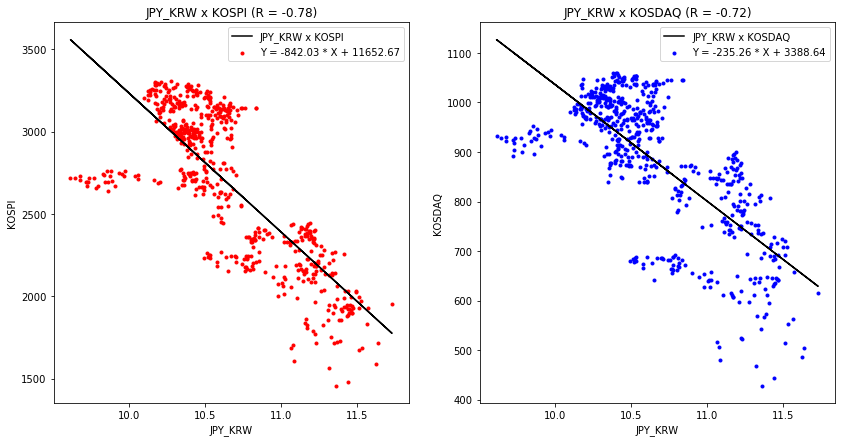

In [278]:
# linear regression analysis
kospi_jpy_regr, kospi_jpy_regr_line, kosdaq_jpy_regr, kosdaq_jpy_regr_line = linearRegressionAnalysis(df.JPY)

# visualize scatter plot and linear regression
visualize(df.JPY, "JPY_KRW", df.KOSPI, kospi_jpy_regr, kospi_jpy_regr_line, df.KOSDAQ, kosdaq_jpy_regr, kosdaq_jpy_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
원엔 환율은 KOSPI와의 상관계수가 -0.78, KOSDAQ과의 상관계수가 -0.72로 분석되었다.  

* * *
## 9. 원위안 환율과 국내 시장 상관관계 분석

### 원위안 환율이란?  
1위안에 대한 원화의 가치  

In [279]:
# get CNY/KRW data
CNY = fdr.DataReader('CNY/KRW', start_date, end_date)

# set data frame
df = pd.DataFrame({'CNY': CNY['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

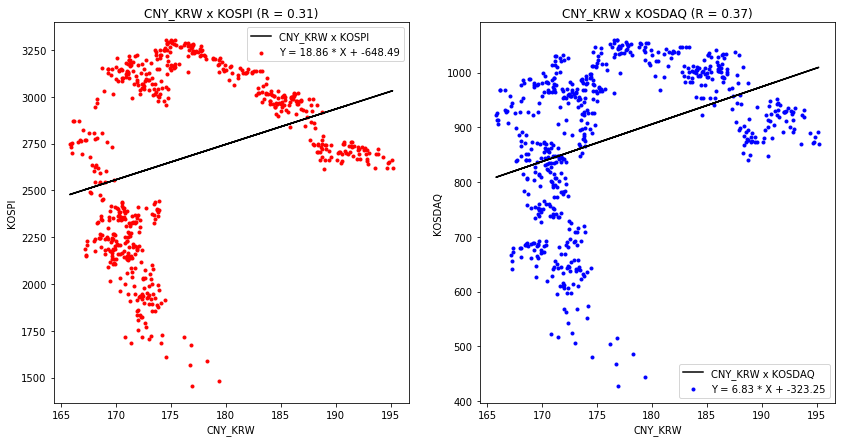

In [280]:
# linear regression analysis
kospi_cny_regr, kospi_cny_regr_line, kosdaq_cny_regr, kosdaq_cny_regr_line = linearRegressionAnalysis(df.CNY)

# visualize scatter plot and linear regression
visualize(df.CNY, "CNY_KRW", df.KOSPI, kospi_cny_regr, kospi_cny_regr_line, df.KOSDAQ, kosdaq_cny_regr, kosdaq_cny_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
원위안 환율은 KOSPI와의 상관계수가 0.31, KOSDAQ과의 상관계수가 0.37로 분석되었다.  

* * *
## 10. 국제 금 시세와 국내 시장 상관관계 분석

### 국제 금 시세란?  
런던금은시장시장에서 공표하는 시세로서, 1 트로이온스(31.1034768g) 당 가격을 나타내며, 시세는 달러를 기준으로 한다.  
  
fred에서는 22년 1월을 기점으로 더이상 데이터를 제공하지 않고 있으며,  
quandl에서는 API KEY를 별도로 발급받아야 하는 관계상,  
국제 금 시세로 미국의 대륙간거래소(ICE)에서 제공하는 금 시세를 사용한다.  

In [281]:
# get Gold data
GLD = fdr.DataReader('ZG', start_date, end_date)

# set data frame
df = pd.DataFrame({'GLD': GLD['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 국제 금 시세가 금일 국내 시장에 반영되는것을 고려
df['GLD'] = df['GLD'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

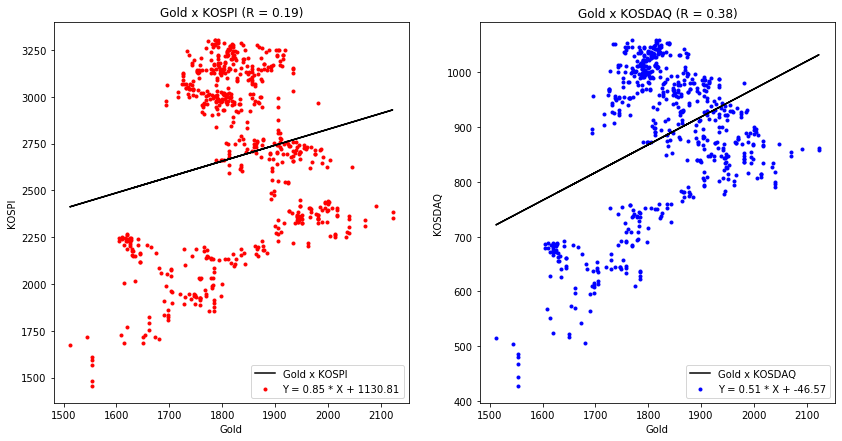

In [282]:
# linear regression analysis
kospi_gld_regr, kospi_gld_regr_line, kosdaq_gld_regr, kosdaq_gld_regr_line = linearRegressionAnalysis(df.GLD)

# visualize scatter plot and linear regression
visualize(df.GLD, "Gold", df.KOSPI, kospi_gld_regr, kospi_gld_regr_line, df.KOSDAQ, kosdaq_gld_regr, kosdaq_gld_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
국제 금 시세는 KOSPI와의 상관계수가 0.19, KOSDAQ과의 상관계수가 0.38로 분석되었다.  

* * *
## 11. 국제 유가와 국내 시장 상관관계 분석

### 국제 유가란?  
국제 유가에는 크게 세 가지가 있다. 

1. 서부 텍사스 중질유
2. 두바이유
3. 브렌트유

한국은 원유 수입량의 약 78%가 두바이유이므로, 두바이유의 시세가 국내 유가에 가장 큰 영향을 준다.  
다만, 두바이유는 선물거래 없이 현물거래만 이루어지므로 관련 지수 데이터 확보에 어려움이 있어서  
국제 유가를 대표하는 '서부 텍사스 중질유(WTI Crude)'를 국제 유가의 지표로 선정했다.  
  
fred에서 21년 11월까지의 데이터만 제공하는 관계로,  
WTI 지표로서 이를 추종하는 ETF인 UNITED STATED OIL ETF (USO)를 사용한다.  

In [283]:
# get WTI data
WTI = fdr.DataReader('USO', start_date, end_date)

# set data frame
df = pd.DataFrame({'WTI': WTI['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 유가 시세가 금일 국내 시장에 반영되는것을 고려
df['WTI'] = df['WTI'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

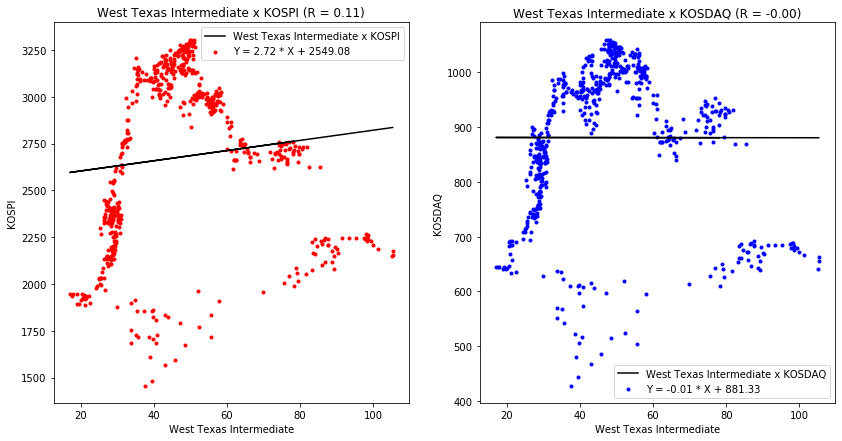

In [284]:
# linear regression analysis
kospi_wti_regr, kospi_wti_regr_line, kosdaq_wti_regr, kosdaq_wti_regr_line = linearRegressionAnalysis(df.WTI)

# visualize scatter plot and linear regression
visualize(df.WTI, "West Texas Intermediate", df.KOSPI, kospi_wti_regr, kospi_wti_regr_line, df.KOSDAQ, kosdaq_wti_regr, kosdaq_wti_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
서부 텍사스 중질유 시세는 KOSPI와의 상관계수가 0.11, KOSDAQ과의 상관계수가 -0.00으로 분석되었다.  

* * *
## 12. 미국 국채 금리와 국내 시장 상관관계 분석

### 미국 국채 금리란? 
미국 정부가 채권을 발행해 돈을 빌릴 때의 금리.  
세계 증시에 큰 영향을 주는 지표 중 하나이다.  
10년 만기 국채 금리를 기준으로 비교를 진행한다.  

In [285]:
# get UGB data
UGB = fdr.DataReader('DGS10', start_date, end_date, data_source='fred')

# set data frame
df = pd.DataFrame({'UGB': UGB['DGS10'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 미국 국채 금리가 금일 국내 시장에 반영되는것을 고려
df['UGB'] = df['UGB'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

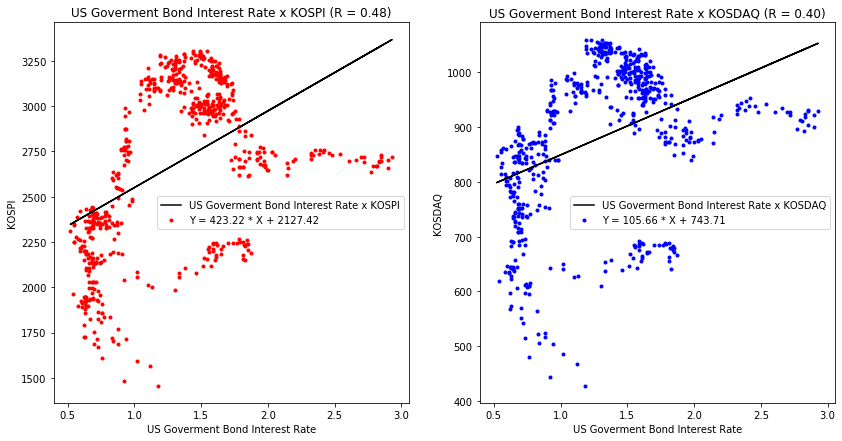

In [286]:
# linear regression analysis
kospi_ugb_regr, kospi_ugb_regr_line, kosdaq_ugb_regr, kosdaq_ugb_regr_line = linearRegressionAnalysis(df.UGB)

# visualize scatter plot and linear regression
visualize(df.UGB, "US Goverment Bond Interest Rate", df.KOSPI, kospi_ugb_regr, kospi_ugb_regr_line, df.KOSDAQ, kosdaq_ugb_regr, kosdaq_ugb_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
10년 만기 미국 국채 금리는 KOSPI와의 상관계수가 0.48, KOSDAQ과의 상관계수가 0.40으로 분석되었다.  

* * *
## 13. 한국 국채 금리와 국내 시장 상관관계 분석

### 한국 국채 금리란? 
한국 정부가 채권을 발행해 돈을 빌릴 때의 금리.  
10년 만기 국채 금리를 기준으로 비교를 진행한다.  

In [287]:
# get KGB data
KGB = fdr.DataReader('KR10YT=RR', start_date, end_date)  

# set data frame
df = pd.DataFrame({'KGB': KGB['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

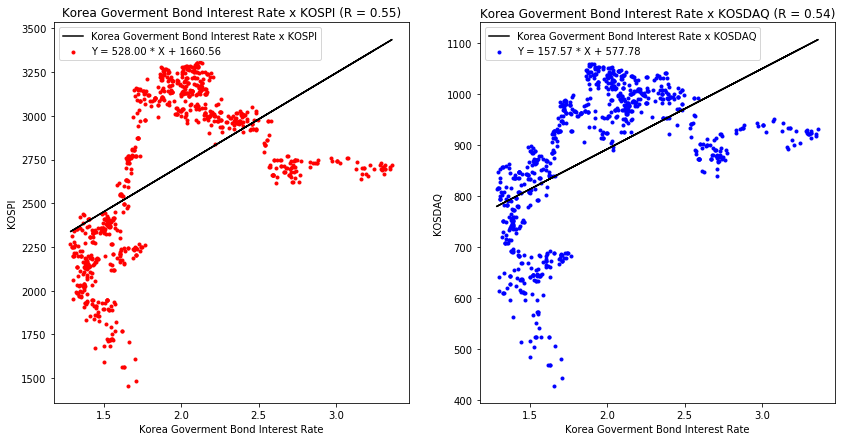

In [288]:
# linear regression analysis
kospi_kgb_regr, kospi_kgb_regr_line, kosdaq_kgb_regr, kosdaq_kgb_regr_line = linearRegressionAnalysis(df.KGB)

# visualize scatter plot and linear regression
visualize(df.KGB, "Korea Goverment Bond Interest Rate", df.KOSPI, kospi_kgb_regr, kospi_kgb_regr_line, df.KOSDAQ, kosdaq_kgb_regr, kosdaq_kgb_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
10년 만기 한국 국채 금리는 KOSPI와의 상관계수가 0.55, KOSDAQ과의 상관계수가 0.54로 분석되었다.  

* * *
## 14. '호주 달러/스위스 프랑' 환율과 국내 시장 상관관계 분석

### '호주 달러/스위스 프랑' 환율이란?
1호주달러에 대한 스위스 프랑의 가치.  
글로벌 금융시장의 리스크 정도를 나타내는 대표적 지표 가운데 하나이다.  
  
자세한 내용은 [경제 기사](https://www.hani.co.kr/arti/economy/economy_general/955260.html)를 참고.

In [289]:
# get ACF data
ACF = fdr.DataReader('AUD/CHF', start_date, end_date)

# set data frame
df = pd.DataFrame({'ACF': ACF['Close'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

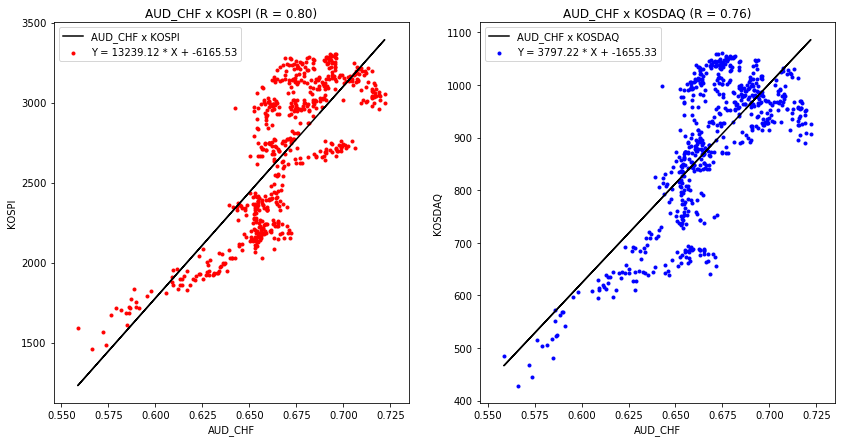

In [290]:
# linear regression analysis
kospi_acf_regr, kospi_acf_regr_line, kosdaq_acf_regr, kosdaq_acf_regr_line = linearRegressionAnalysis(df.ACF)

# visualize scatter plot and linear regression
visualize(df.ACF, "AUD_CHF", df.KOSPI, kospi_acf_regr, kospi_acf_regr_line, df.KOSDAQ, kosdaq_acf_regr, kosdaq_acf_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
'호주 달러/스위스 프랑' 환율은 KOSPI와의 상관계수가 0.80, KOSDAQ과의 상관계수가 0.76으로 분석되었다.  

* * *
## 15. 변동성 지수와 국내 시장 상관관계 분석

### 변동성 지수란?
S&P 500 지수 옵션의 변동성을 나타내는 지표이며, 변동성이 커질 것이라는 기대심리가 높아질수록 올라가는 특징을 가지고 있다.  
주식시장의 변동성과 함께 움직이는 VIX 지수는 주식시장과 역방향으로 움직이는 경향이 있어서,  
대체로 VIX 지수가 높으면 하락장이 펼쳐지는 경향이 있다.  
VIX는 공포지수라고도 불린다.  

In [291]:
# get VIX data
VIX = fdr.DataReader('VIXCLS', start_date, end_date, data_source='fred')

# set data frame
df = pd.DataFrame({'VIX': VIX['VIXCLS'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 미국 시장이 금일 국내 시장에 반영되는것을 고려
df['VIX'] = df['VIX'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

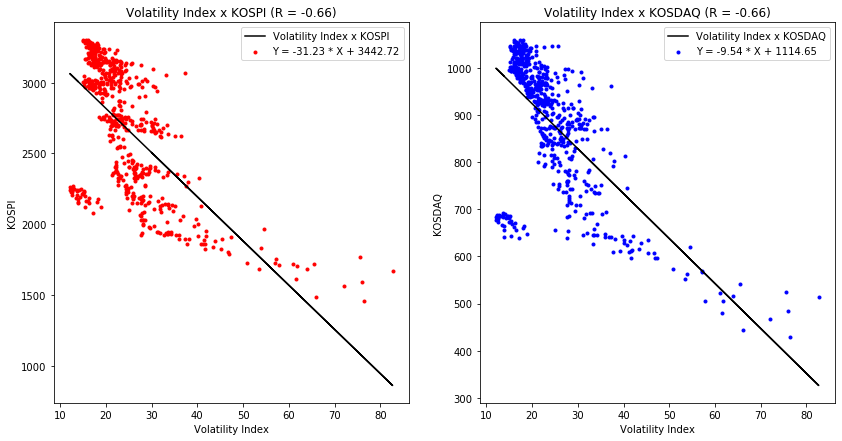

In [292]:
# linear regression analysis
kospi_vix_regr, kospi_vix_regr_line, kosdaq_vix_regr, kosdaq_vix_regr_line = linearRegressionAnalysis(df.VIX)

# visualize scatter plot and linear regression
visualize(df.VIX, "Volatility Index", df.KOSPI, kospi_vix_regr, kospi_vix_regr_line, df.KOSDAQ, kosdaq_vix_regr, kosdaq_vix_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
변동성 지수는 KOSPI와의 상관계수가 -0.66, KOSDAQ과의 상관계수가 -0.66으로 분석되었다.  

* * *
## 16. 신용경색 지표와 국내 시장 상관관계 분석

### 신용경색 지표란?
신용경색 지표로 TED Spread가 사용되는데, 이는 3개월물 미국국채 수익률과 런던은행 간 금리인 3개월물 리보의 격차를 의미한다.  
스프레드가 클수록 유동성 공급이 어려움을 의미한다.  

In [293]:
# get TED data
TED = fdr.DataReader('TEDRATE', start_date, end_date, data_source='fred')

# set data frame
df = pd.DataFrame({'TED': TED['TEDRATE'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 미국 시장이 금일 국내 시장에 반영되는것을 고려
df['TED'] = df['TED'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

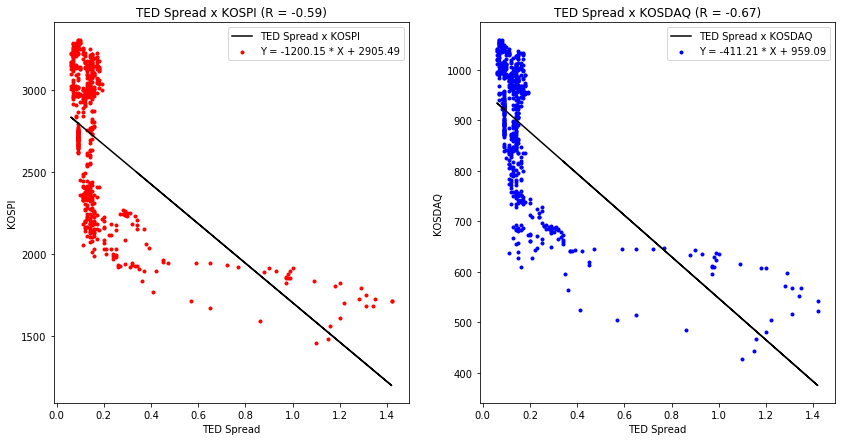

In [294]:
# linear regression analysis
kospi_ted_regr, kospi_ted_regr_line, kosdaq_ted_regr, kosdaq_ted_regr_line = linearRegressionAnalysis(df.TED)

# visualize scatter plot and linear regression
visualize(df.TED, "TED Spread", df.KOSPI, kospi_ted_regr, kospi_ted_regr_line, df.KOSDAQ, kosdaq_ted_regr, kosdaq_ted_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
신용경색 지표는 KOSPI와의 상관계수가 -0.59, KOSDAQ과의 상관계수가 -0.67으로 분석되었다.  

* * *
## 17. 금융스트레스지수와 국내 시장 상관관계 분석

### 금융스트레스지수란?
케나다 중앙은행이 산출하는 지표로서,  
금융시장과 정책당국의 불확실한 요인에 따라 경제주체들이 느끼는 피로감을 계량화하여 산출한 지수를 말한다.  
금융변수에 대한 기대값이 변하거나 표준편차로 표현되는 리스크가 커질 경우 금융스트레스가 높아진다.  

In [295]:
# get FSI data
FSI = fdr.DataReader('STLFSI2', start_date, end_date, data_source='fred')

# set data frame
df = pd.DataFrame({'FSI': FSI['STLFSI2'], 'KOSPI': KOSPI['Close'], 'KOSDAQ': KOSDAQ['Close']})

# 전일 케나다 지표가 금일 국내 시장에 반영되는것을 고려
df['FSI'] = df['FSI'].shift(1)

# fill NaN values
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

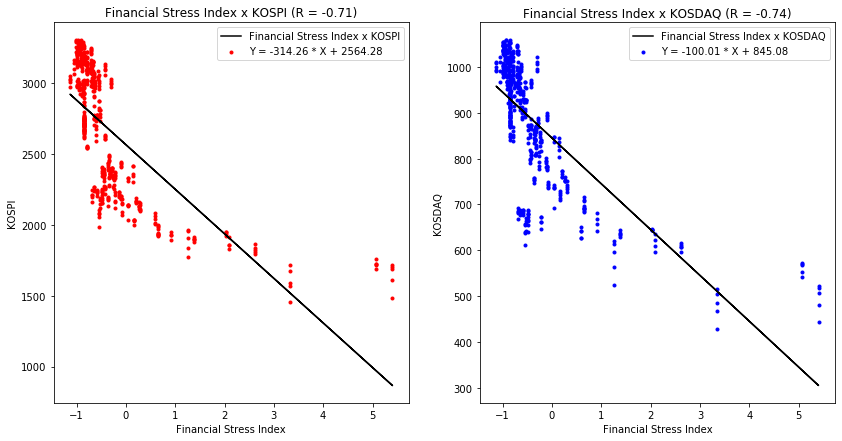

In [296]:
# linear regression analysis
kospi_fsi_regr, kospi_fsi_regr_line, kosdaq_fsi_regr, kosdaq_fsi_regr_line = linearRegressionAnalysis(df.FSI)

# visualize scatter plot and linear regression
visualize(df.FSI, "Financial Stress Index", df.KOSPI, kospi_fsi_regr, kospi_fsi_regr_line, df.KOSDAQ, kosdaq_fsi_regr, kosdaq_fsi_regr_line)

2020년 1월 6일부터 2022년 4월 29일까지의 데이터로 분석한 결과,  
금융스트레스지수는 KOSPI와의 상관계수가 -0.71, KOSDAQ과의 상관계수가 -0.74로 분석되었다.  

* * *
## 분석 의견

1. MA, MFI, RSI 등의 지표는 개별 종목에 대한 분석이 의미있다고 생각해서 보류하였음
2. 분석 기간은 코로나 대폭락장을 포함하여 최근 2년간의 경향을 보도록 설정하였음 (22년 5월 기준)
3. 분석 기간에 따라 결과는 매우 다르게 나타날 수 있음
4. KOSPI와 KOSDAQ은 비슷한 경향성을 보이는것으로 보아, 추후 분석시에는 KOSPI에 대한 분석만 진행해도 될 것 같음
5. 유가는 두바이유가 아닌 서부 텍사스 중질유를 기준으로 분석되어서 결과에 큰 비중을 두지 않아도 될 것 같음
6. 미국 국채 금리 변동의 여파는 시장에 선반영되는 경향이 강하여 지표 자체는 큰 의미를 가지지 않는 것 같음
7. 한국경제의 높은 대외의존도로 인하여 AUD/CHF와 높은 상관관계를 보이는 것 같음

* * *
## 분석 결과

TBD